# Shopping Habits of Instacart Customers

# Contents <a id='back'></a>

* [Introduction](#introduction)
* [Data Overview](#data_overview)
* [Step 1. Find and remove duplicate values](#duplicates)
    * [1.1 `orders` dataframe](#orders_df_duplicates)
    * [1.2 `products` dataframe](#products_df_duplicates)
    * [1.3 `departments` dataframe](#departments_df_duplicates)
    * [1.4 `aisles` dataframe](#aisles_df_duplicates)
    * [1.5 `order_products` dataframe](#order_products_df_conclusions)
* [Step 2. Find and remove missing values](#missing_values)
    * [2.1 `products` dataframe](#products_df_missing_values)
    * [2.2 `orders` dataframe](#orders_df_missing_values)
    * [2.3 `order_products` dataframe](#order_products__df_missing_values)
* [Step 3. Analysis A](#analysis_a)
    * [2.4 A1](#a1)
    * [2.5 A2](#a2)
    * [2.6 A3](#a3)
    * [2.7 A4](#a4)
* [Step 4. Analysis B](#analysis_b)
    * [2.8 B1](#b1)
    * [2.9 B2](#b2)
    * [2.10 B3](#b3)
* [Step 5. Analysis C](#analysis_c)
    * [2.12 C2](#c2)
    * [2.13 C3](#c3)
* [Findings](#findings)

# Introduction <a id='introduction'></a>

For this project, data from Instacart will be analyzed.
Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.
The dataset that was provided for has been modified from the original, reducing the size of the dataset so that calculations run faster and missing and duplicate values have been introduced. The distributions were still preserved from the original data when changes were made.

### Goal

The goal is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. This project will require plots that communicate the results.

### Stages 
There are five tables in the dataset, and all of them will be used for data preprocessing and EDA: `/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv`, and `/datasets/order_products.csv`.

For the data overview, general information will be pulled up to assess if anything regarding formatting needs to be cleaned up for analysis. In the preprocessing stage, duplicate and missing values will be taken into account and appropriate changes to the dataframes will be made. For analysis, there will be three levels of difficulty, Analysis A (Easy) and Analysis B (Medium), in which all tasks must be completed, and Analysis C (Hard), where at least two of the tasks must be completed.
 
The project will consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Completing varying difficulty analyses
 
[Back to Contents](#back)

# Data Overview <a id='data_overview'></a>

In [1]:
#importing pandas
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
#reading the`orders` dataframe file and storing it to orders_df
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
display(orders_df.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
# obtaining general information about the data in orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
#reading the`products` dataframe file and storing it to products_df
products_df = pd.read_csv('/datasets/products.csv', sep=';')
display(products_df.head())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# obtaining general information about the data in products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
#reading the`departments` dataframe file and storing it to dept_df
dept_df = pd.read_csv('/datasets/departments.csv', sep=';')
display(dept_df.head())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# obtaining general information about the data in dept_df
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
#reading the`aisles` dataframe file and storing it to aisles_df
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
display(aisles_df.head())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
# obtaining general information about the data in aisles_df
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
#reading the`order_products` dataframe file and storing it to order_prod_df
order_prod_df = pd.read_csv('/datasets/order_products.csv', sep=';')
display(order_prod_df.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [11]:
# obtaining general information about the data in order_prod_df
order_prod_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Note that the files have nonstandard formatting, thus the `sep=` argument was needed to read the data correctly.
Also the order_products.csv contains many rows of data. When a DataFrame has too many rows, info() will not print the non-null counts by default, so show_counts=True was needed to call info(). The products_df and orders_df appear to have missing values as well.

## Find and remove duplicate values (and describe why you make your choices) <a id='duplicates'></a>

### `orders` data frame <a id='orders_df_duplicates'></a>

In [12]:
# Check for duplicated orders
orders_df.duplicated().sum()

15

In [13]:
# Check for all orders placed Wednesday at 2:00 AM
orders_df_filtered = orders_df[(orders_df['order_dow'] == 2) & (orders_df['order_hour_of_day'] == 2)]
print(orders_df_filtered)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [14]:
# Remove duplicate orders
orders_df = orders_df.drop_duplicates()

# comfirm duplicate orders were dropped
orders_df.duplicated().sum()

0

In [15]:
# Double check for duplicate rows
orders_df.duplicated().sum()

0

In [16]:
# Double check for duplicate order IDs only
orders_df.duplicated(subset='order_id').sum()

0

Fifteen duplicate rows were found and successfully removed. To check for less obvious duplicates, diplicate order IDs were checked as well, but none were found.

### `products` data frame <a id='products_df_duplicates'></a>

In [17]:
# Check for fully duplicate rows
products_df.duplicated().sum()

0

In [18]:
# Check for just duplicate product IDs
products_df.duplicated(subset='product_id').sum()

0

In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name'] = products_df['product_name'].str.lower()
products_df.duplicated(subset='product_name').sum()

1361

In [20]:
# Check for duplicate product names that aren't missing
prod_duplicated = products_df[products_df['product_name'].duplicated()]
prod_duplicated.value_counts()

product_id  product_name                              aisle_id  department_id
2059        biotin 1000 mcg                           47        11               1
5456        green tea with ginseng and honey          96        20               1
44088       ibuprofen tablets 200 mg                  133       11               1
44079       blanc de noirs                            134       5                1
43872       original bbq sauce                        5         13               1
                                                                                ..
29731       potatoes o'brien with onions and peppers  129       1                1
29518       beef chili with beans                     59        15               1
26990       candy bar                                 45        19               1
26727       nutrition protein mix blueberry nut       125       19               1
49694       burrito- steak & cheese                   38        1                1
Length: 1

No duplicate rows or duplicate product IDs were found. However, many duplicate product names were found. These duplicate product names do not impact the data and should not be removed since no duplicate product IDs were confirmed, thus these duplicate names most likely represent products that have the same name but perhaps are from a different brand or manufacturer since it has its own product ID.

### `departments` data frame <a id='departments_df_duplicates'></a>

In [21]:
# Check for fully duplicate rows
dept_df.duplicated().sum()

0

In [22]:
# Double check for any other tricky duplicates
dept_df.duplicated(subset=['department_id', 'department']).sum()

0

No duplicate rows or other duplicates within the department_id and department columns were found.

### `aisles` data frame <a id='aisles_df_duplicates'></a>

In [23]:
# Check for fully duplicate rows
aisles_df.duplicated().sum()

0

In [24]:
# Double check for any other tricky duplicates
aisles_df.duplicated(subset=['aisle_id', 'aisle']).sum()

0

No duplicate rows or other duplicates within the aisle_id and aisle columns were found.

### `order_products` data frame <a id='order_products_df_duplicates'></a>

In [25]:
# Check for fullly duplicate rows
order_prod_df.duplicated().sum()

0

In [26]:
# Double check for any other tricky duplicates
order_prod_df.duplicated(subset=['order_id', 'product_id']).sum()

0

No duplicate rows or other duplicates within the order_id and product_id columns were found.

## Find and remove missing values <a id='missing_values'></a>


### `products` data frame <a id='products_df_missing_values'></a>

In [27]:
#obtaining general info for products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [28]:
# Are all of the missing product names associated with aisle ID 100?
print(products_df.isna().sum()) #shows there are 1258 total rows of missing product names
products_df[products_df['aisle_id'] == 100] #shows the same number of missing rows are also associated with aisle ID 100

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


For all missing product names found, it was determined that all of those products are associated with aisle ID 100.

In [29]:
# Are all of the missing product names associated with department ID 21?
products_df[products_df['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


For all missing product names found, it was determined that all of those products are associated with department ID 21.

In [30]:
# What is this ailse and department?
print(dept_df[dept_df['department_id'] == 21])
print()
print(aisles_df[aisles_df['aisle_id'] == 100])

#both the aisle and department are missing for the respective IDs being asked for

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


In [31]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

# Checking if missing values were replaced with 'Unknown'
print(products_df.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


### `orders` data frame <a id='orders_df_missing_values'></a>

In [32]:
#obtaining general info for orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [33]:
# Are there any missing values where it's not a customer's first order?
non_first_order_df = orders_df[(~orders_df['order_number'] == 1).isna()] 
print(non_first_order_df)

#for rows that are not a customer's first order, there are no missing values since an empty dataframe was returned

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


### `order_products` data frame <a id='order_products_df_missing_values'></a>

In [34]:
#obtaining general info for order_products_df
order_prod_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [35]:
# What are the min and max values in this column?
print(order_prod_df['add_to_cart_order'].min())
print(order_prod_df['add_to_cart_order'].max())

1.0
64.0


In [36]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order = order_prod_df[order_prod_df['add_to_cart_order'].isna()]['order_id'].unique()
missing_order

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [37]:
# Do all orders with missing values have more than 64 products? Yes
missing = order_prod_df[order_prod_df['order_id'].isin(missing_order)]

# missing.groupby('order_id')['product_id'].count() is another possible method
missing['order_id'].value_counts()

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
747668      65
2170451     65
2729254     65
2652650     65
9310        65
Name: order_id, Length: 70, dtype: int64

In [38]:
# Replace missing values with 999 and convert column to integer type
order_prod_df['add_to_cart_order'] = order_prod_df['add_to_cart_order'].fillna('999')
order_prod_df['add_to_cart_order'] = order_prod_df['add_to_cart_order'].astype('int')

#checking if add_to_cart_values were converted to integer type
print(order_prod_df.info())

print() 

#checking if missing values were successfully replaced
print(order_prod_df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


# [A] Easy (must complete all to pass) <a id='analysis_a'></a>

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6) <a id='a1'></a>

In [39]:
# Finding the range of values for 'order_hour_of_day' if it's from 0 to 23 by finding the min and max
print(orders_df['order_hour_of_day'].min())
print(orders_df['order_hour_of_day'].max())

0
23


In [40]:
# Finding the range of values for 'order_dow' if it's from 0 to 6 by finding the min and max
print(orders_df['order_dow'].min())
print(orders_df['order_dow'].max())

0
6


The min and max 'order_hour_of_day' was found to be 0 and 23, respectively, which is sensible since there are 24 hours in a day. The min and max for for 'order_dow' was found to be 0 and 6 respectively, which is also sensible since there are 7 days in a week.

### [A2] What time of day do people shop for groceries? <a id='a2'></a>

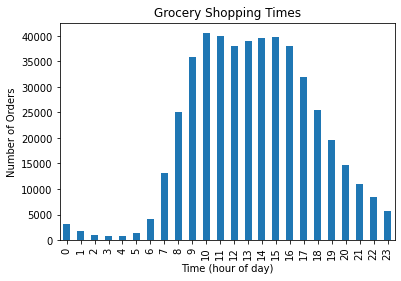

In [41]:
# Create a plot that shows how many orders are placed for each hour of the day
grocery_times = orders_df['order_hour_of_day'].value_counts().sort_index()

grocery_times.plot(
        title='Grocery Shopping Times',
        xlabel='Time (hour of day)',
        ylabel='Number of Orders',
        kind='bar',
        x='hour_of_day',
        y='value_counts'
)

plt.show()

Based on the plot, it appears that the most popular shopping times are between 9:00 AM and 5:00 PM, tapering on either side of the popular time range, and very little shopping is done in the extremely early hours of the day, as expected.

### [A3] What day of the week do people shop for groceries? <a id='a3'></a>

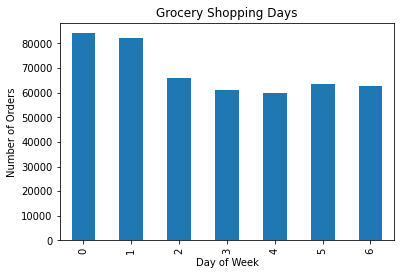

In [42]:
# Create a plot that shows what day of the week people shop for groceries
grocery_day = orders_df['order_dow'].value_counts().sort_index()

grocery_day.plot(
        title='Grocery Shopping Days',
        xlabel='Day of Week',
        ylabel='Number of Orders',
        kind='bar',
        x='order_dow',
        y='value_counts'
)

plt.show()

The most popular shopping days appear to be in the beginning of the week, especially the first two days, with the rest of the week having about the same amount of shopping.

### [A4] How long do people wait until placing another order? <a id='a4'></a>

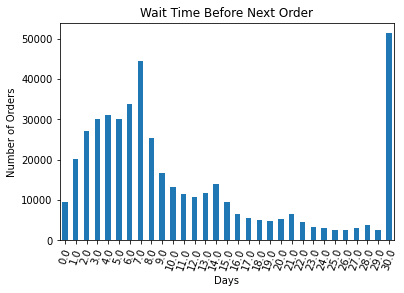

In [43]:
# Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum value
prior_order_day = orders_df['days_since_prior_order'].value_counts().sort_index()

prior_order_day.plot(
        title='Wait Time Before Next Order',
        xlabel='Days',
        ylabel='Number of Orders',
        kind='bar',
        x='days_since_prior_order',
        y='value_counts'
        
)

plt.xticks(rotation=70)
plt.show()

The maximum values correspond to people placing another order monthly (every 30 days) or weekly (every 7 days), and the minumum values appear to be the days preceding the last day of the month 

# [B] Medium (must complete all to pass) <a id='analysis_b'></a>

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see. <a id='b1'></a>

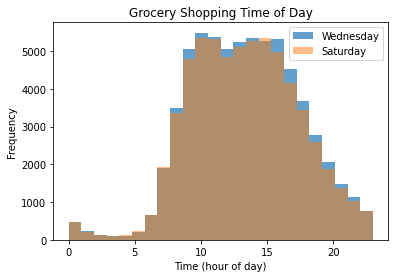

In [44]:
# overlaying histogram plots for Wednesday and Saturday
wed_df = orders_df[orders_df['order_dow'] == 2]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.7, title='Grocery Shopping Time of Day')
sat_df = orders_df[orders_df['order_dow'] == 5]['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.5)

plt.xlabel('Time (hour of day)')
plt.legend(['Wednesday', 'Saturday'])
plt.show() 

Overall, the distributions on Wednesdays and Saturdays for times of the day that people do grocery shopping is very similar, Saturdays only being slightly less than Wednesday.

### [B2] What's the distribution for the number of orders per customer? <a id='b2'></a>

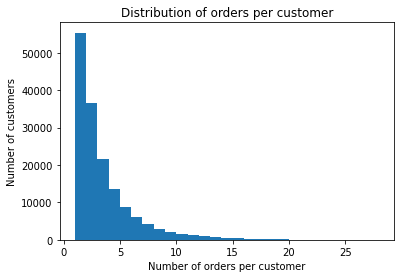

In [45]:
# plotting the distribtution for the number of orders per customer
orders_per_customer = orders_df.groupby('user_id').agg({'order_number': 'count'})

plt.hist(orders_per_customer['order_number'], bins=27)
plt.xlabel('Number of orders per customer')
plt.ylabel('Number of customers')
plt.title('Distribution of orders per customer')
plt.show()

This plot displays how many people only placed 1 order, how many people placed only 2 orders, etc. Thus it can be seen from this graph that most people only place 1 order, less people place 2 orders, even less place 3 orders, etc. Less people are more likely to make multiple orders.

### [B3] What are the top 20 popular products (display their id and name)? <a id='b3'></a>

In [46]:
# Filtering order_prod_df to find the top 20 product_id and changing the respective column names after resetting the index
top_20_product_id = order_prod_df['product_id'].value_counts().head(20).reset_index()
top_20_product_id.columns = ['product_id', 'count']

# Merging the top_20_product_id with products_df to find the respective product names that correspond to the top 20 item IDs
popular_products = top_20_product_id.merge(products_df, on='product_id', how='left')

print(popular_products[['product_id','product_name']])

    product_id              product_name
0        24852                    banana
1        13176    bag of organic bananas
2        21137      organic strawberries
3        21903      organic baby spinach
4        47209      organic hass avocado
5        47766           organic avocado
6        47626               large lemon
7        16797              strawberries
8        26209                     limes
9        27845        organic whole milk
10       27966       organic raspberries
11       22935      organic yellow onion
12       24964            organic garlic
13       45007          organic zucchini
14       39275       organic blueberries
15       49683            cucumber kirby
16       28204        organic fuji apple
17        5876             organic lemon
18        8277  apple honeycrisp organic
19       40706    organic grape tomatoes


The most popular item appears to be bananas.

# [C] Hard <a id='analysis_c'></a>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)? <a id='c2'></a>

In [48]:
# Filter the order products dataframe to only include reordered items
reordered_products_df = order_prod_df[order_prod_df['reordered'] == 1]

# Merge the reordered products dataframe with the products dataframe on 'product_id'
merged_df = reordered_products_df.merge(products_df, on='product_id')

# Group the merged dataframe by 'product_id' and 'product_name', and aggregate using the count function
grouped_df = merged_df.groupby(['product_id', 'product_name']).agg({'reordered': 'count'}).reset_index()

# Sort the grouped dataframe by the count of reorders in descending order and display the top 20
top_20_reorders = grouped_df.sort_values(by='reordered', ascending=False).head(20)
print(top_20_reorders[['product_id', 'product_name', 'reordered']])

       product_id              product_name  reordered
18104       24852                    banana      55763
9528        13176    bag of organic bananas      44450
15368       21137      organic strawberries      28639
15936       21903      organic baby spinach      26233
34407       47209      organic hass avocado      23629
34828       47766           organic avocado      18743
20285       27845        organic whole milk      16251
34725       47626               large lemon      15044
20375       27966       organic raspberries      14748
12193       16797              strawberries      13945
19088       26209                     limes      13327
16700       22935      organic yellow onion      11145
18186       24964            organic garlic      10411
32792       45007          organic zucchini      10076
36219       49683            cucumber kirby       9538
20543       28204        organic fuji apple       8989
5978         8277  apple honeycrisp organic       8836
28607     

### [C3] For each product, what proportion of its orders are reorders? <a id='c3'></a>

In [49]:
# Merge the two dataframes on the 'product_id' column 
merge_df = products_df.merge(order_prod_df, on='product_id')

# Group the merged dataframe by 'product_id' and calculate the total number of orders for each product
total_orders = merge_df.groupby('product_id')['order_id'].nunique()

# Filter the merged dataframe to only include reordered items and group it by 'product_id' again to get the total number of reorder orders for each product
reorder_orders = merge_df.loc[merge_df['reordered'] == 1].groupby('product_id')['order_id'].nunique()

# Calculating the reorder proportion
reorder_proportions = (reorder_orders / total_orders).to_frame(name='reorder_proportion')

# Merge the products dataframe with the reorder proportion dataframe
result_df = reorder_proportions.merge(products_df[['product_id', 'product_name']], on='product_id')

# Print the resulting table
print(result_df)


       product_id  reorder_proportion  \
0               1            0.564286   
1               2                 NaN   
2               3            0.738095   
3               4            0.510204   
4               7            0.500000   
...           ...                 ...   
45568       49690            0.800000   
45569       49691            0.430556   
45570       49692            0.416667   
45571       49693            0.440000   
45572       49694            0.333333   

                                            product_name  
0                             chocolate sandwich cookies  
1                                       all-seasons salt  
2                   robust golden unsweetened oolong tea  
3      smart ones classic favorites mini rigatoni wit...  
4                         pure coconut water with orange  
...                                                  ...  
45568                      high performance energy drink  
45569                      original

# Findings <a id='findings'></a>

After carfeul preprocessing of the data, multiple valuable analyses of the instacart data was done, such as determining the days and times that people grocery shop, when people place orders again, popular products, and how many people place multiple orders. These results can be used to infer what types and how many products should be ordered in the future and understand the shopping habits of customers to have adequate staff and stock of products for certain days and times of the week that are more popular.